In [1]:
library("patchwork")
library("DescTools")
data = read.csv("data/tempuf_30-36_MasineAli.csv")

In [2]:
colnames(data)

[1] "Temperature.for.Cap.30...C."      "Ratio.350.nm...330.nm.for.Cap.30"
 [3] "Temperature.for.Cap.30...C..1"    "X350.nm.for.Cap.30"              
 [5] "Temperature.for.Cap.30...C..2"    "X330.nm.for.Cap.30"              
 [7] "Temperature.for.Cap.31...C."      "Ratio.350.nm...330.nm.for.Cap.31"
 [9] "Temperature.for.Cap.31...C..1"    "X350.nm.for.Cap.31"              
[11] "Temperature.for.Cap.31...C..2"    "X330.nm.for.Cap.31"              
[13] "Temperature.for.Cap.32...C."      "Ratio.350.nm...330.nm.for.Cap.32"
[15] "Temperature.for.Cap.32...C..1"    "X350.nm.for.Cap.32"              
[17] "Temperature.for.Cap.32...C..2"    "X330.nm.for.Cap.32"              
[19] "Temperature.for.Cap.34...C."      "Ratio.350.nm...330.nm.for.Cap.34"
[21] "Temperature.for.Cap.34...C..1"    "X350.nm.for.Cap.34"              
[23] "Temperature.for.Cap.34...C..2"    "X330.nm.for.Cap.34"              
[25] "Temperature.for.Cap.35...C."      "Ratio.350.nm...330.nm.for.Cap.35"
[27] "Temperature.for.Cap.35...C..1"    "X350.nm.for.Cap.35"              
[29] "Temperature.for.Cap.35...C..2"    "X330.nm.for.Cap.35"              
[31] "Temperature.for.Cap.36...C."      "Ratio.350.nm...330.nm.for.Cap.36"
[33] "Temperature.for.Cap.36...C..1"    "X350.nm.for.Cap.36"              
[35] "Temperature.for.Cap.36...C..2"    "X330.nm.for.Cap.36"

# Lysozyme

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


pdf 
  2

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


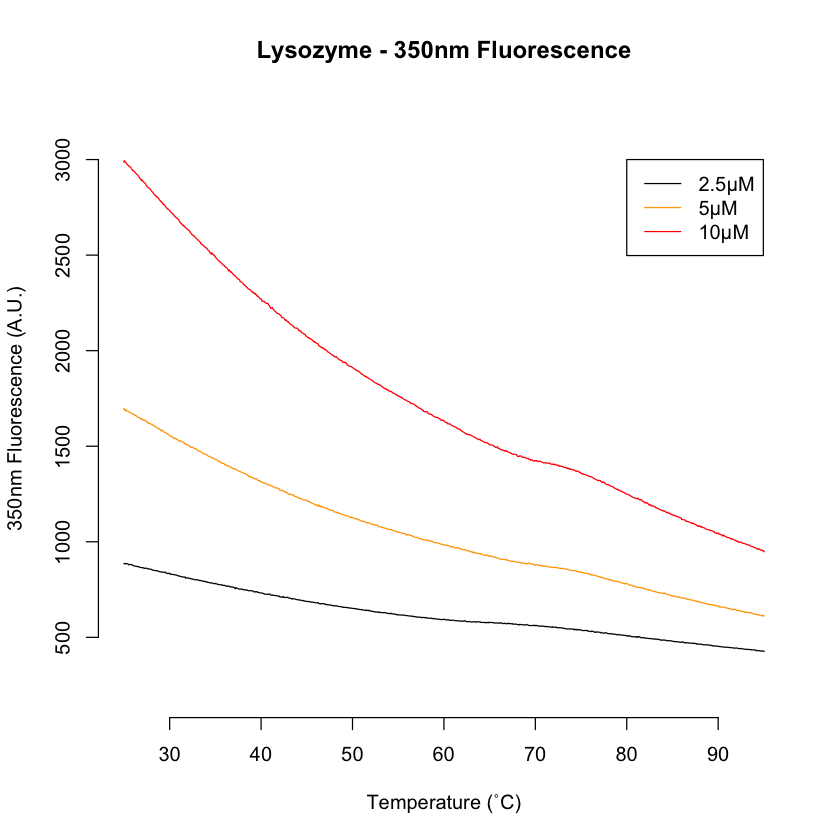

integer(0)

pdf 
  2

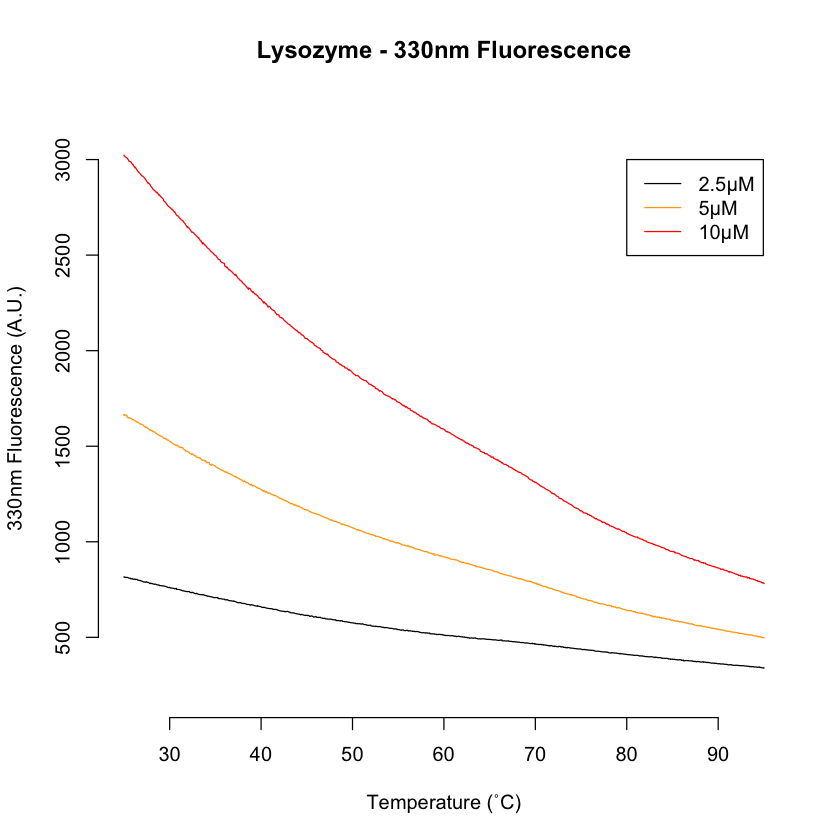

In [18]:
theme = c("black", "orange", "red")

# Fluorescence of 350nm
Eg1 <- plot(x = data$Temperature.for.Cap.34...C., y = data$X350.nm.for.Cap.34, col=theme[1],
     type = "l", 
     ylim = c(200,3200),
     xlab="Temperature (˚C)", ylab="350nm Fluorescence (A.U.)",
     main="Lysozyme - 350nm Fluorescence", frame = FALSE) +
lines(x = data$Temperature.for.Cap.35...C., y = data$X350.nm.for.Cap.35, col=theme[2]) +
lines(x = data$Temperature.for.Cap.36...C., y = data$X350.nm.for.Cap.36, col=theme[3])
legend(80, 3000, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_lys_350.png', width=500, height=500)

# Fluorescence of 330nm
plot(x = data$Temperature.for.Cap.34...C., y = data$X330.nm.for.Cap.34, col=theme[1],
     type = "l", 
     ylim = c(200,3200),
     xlab="Temperature (˚C)", ylab="330nm Fluorescence (A.U.)",
     main="Lysozyme - 330nm Fluorescence", frame = FALSE) + 
lines(x = data$Temperature.for.Cap.35...C., y = data$X330.nm.for.Cap.35, col=theme[2]) +
lines(x = data$Temperature.for.Cap.36...C., y = data$X330.nm.for.Cap.36, col=theme[3])
legend(80, 3000, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_lys_330.png', width=500, height=500)

In [4]:
lys_transitions = c(
    (max(data$Ratio.350.nm...330.nm.for.Cap.34) + min(data$Ratio.350.nm...330.nm.for.Cap.34))/2,
    (max(data$Ratio.350.nm...330.nm.for.Cap.35) + min(data$Ratio.350.nm...330.nm.for.Cap.35))/2,
    (max(data$Ratio.350.nm...330.nm.for.Cap.36) + min(data$Ratio.350.nm...330.nm.for.Cap.36))/2
)
lys_transitions_T = c(
    data$Temperature.for.Cap.34...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.34, lys_transitions[1], which = TRUE) + 1],
    data$Temperature.for.Cap.35...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.35, lys_transitions[2], which = TRUE) + 1],
    data$Temperature.for.Cap.36...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.36, lys_transitions[3], which = TRUE) + 1]
)

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


pdf 
  2

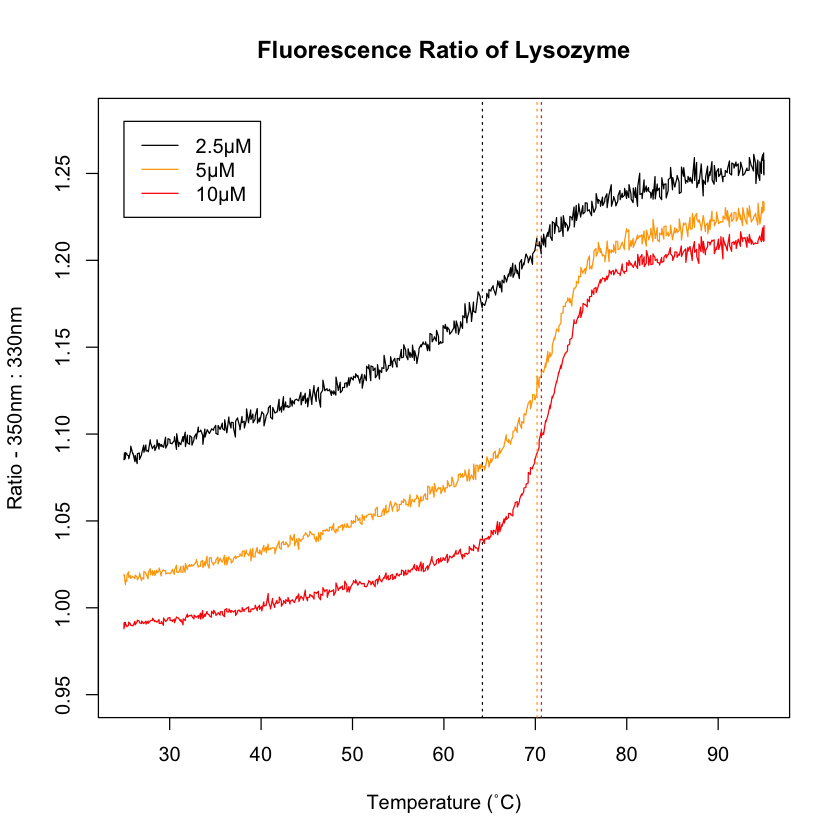

In [17]:
theme = c("black", "orange", "red")

# Ratio - 350nm : 330nm
plot(x = data$Temperature.for.Cap.34...C., y = data$Ratio.350.nm...330.nm.for.Cap.34, col=theme[1],
     type = "l",
     ylim = c(0.95,1.28), 
     xlab="Temperature (˚C)", ylab="Ratio - 350nm : 330nm",
     main="Fluorescence Ratio of Lysozyme")
lines(x = data$Temperature.for.Cap.35...C., y = data$Ratio.350.nm...330.nm.for.Cap.35, col=theme[2])
lines(x = data$Temperature.for.Cap.36...C., y = data$Ratio.350.nm...330.nm.for.Cap.36, col=theme[3])
abline(v=lys_transitions_T[1], lty=3, col=theme[1])
abline(v=lys_transitions_T[2], lty=3, col=theme[2])
abline(v=lys_transitions_T[3], lty=3, col=theme[3])
legend(25, 1.28, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_lys_ratio.png', width=750, height=750)

# BSA

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


integer(0)

pdf 
  2

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


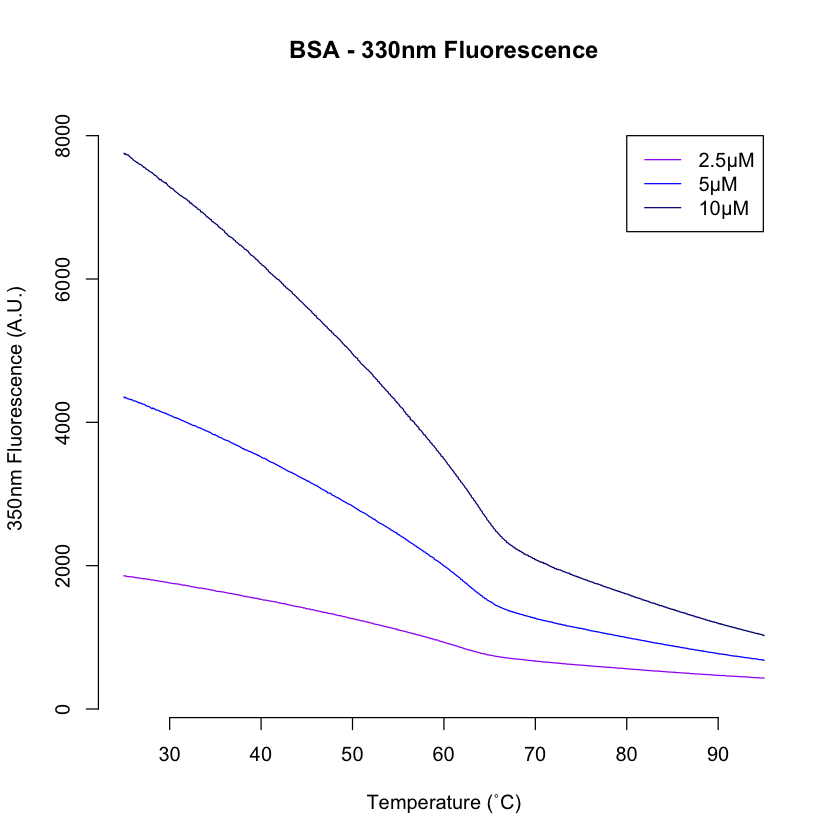

integer(0)

pdf 
  2

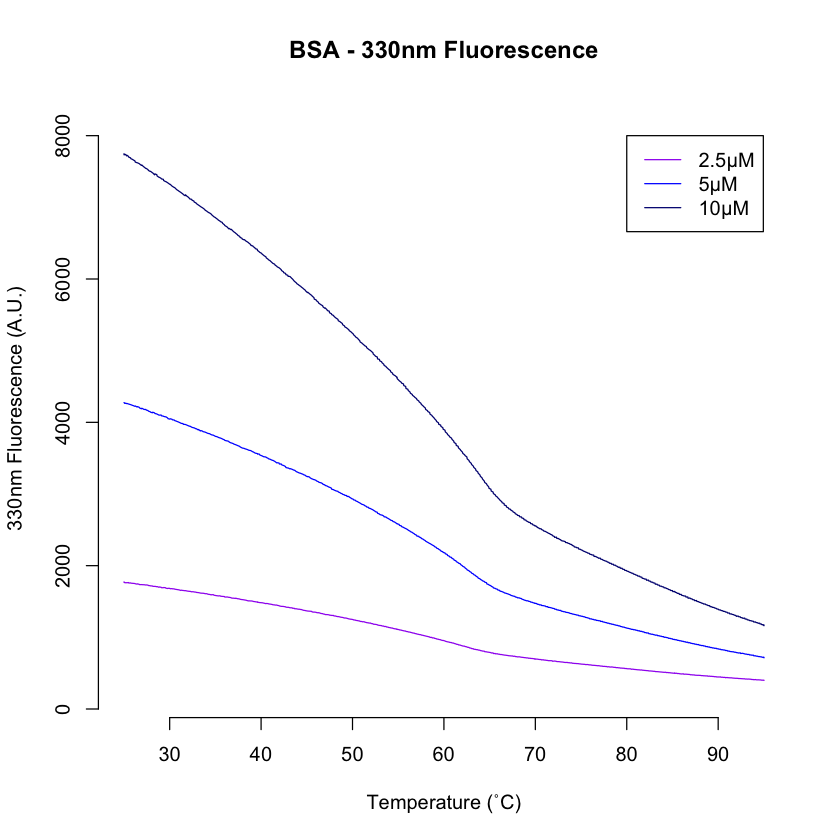

In [19]:
theme = c("purple", "blue", "navy")

# Fluorescence of 350nm
plot(x = data$Temperature.for.Cap.30...C., y = data$X350.nm.for.Cap.30, col=theme[1],
     type = "l", 
     ylim = c(200,8200),
     xlab="Temperature (˚C)", ylab="350nm Fluorescence (A.U.)",
     main="BSA - 330nm Fluorescence", frame = FALSE) +
lines(x = data$Temperature.for.Cap.31...C., y = data$X350.nm.for.Cap.31, col=theme[2]) +
lines(x = data$Temperature.for.Cap.32...C., y = data$X350.nm.for.Cap.32, col=theme[3])
legend(80, 8000, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_BSA_350.png', width=500, height=500)

# Fluorescence of 330nm
plot(x = data$Temperature.for.Cap.30...C., y = data$X330.nm.for.Cap.30, col=theme[1],
     type = "l", 
     ylim = c(200,8200),
     xlab="Temperature (˚C)", ylab="330nm Fluorescence (A.U.)",
     main="BSA - 330nm Fluorescence", frame = FALSE) + 
lines(x = data$Temperature.for.Cap.31...C., y = data$X330.nm.for.Cap.31, col=theme[2]) +
lines(x = data$Temperature.for.Cap.32...C., y = data$X330.nm.for.Cap.32, col=theme[3])
legend(80, 8000, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_BSA_330.png', width=500, height=500)

In [7]:
bsa_transitions = c(
    (min(data$Ratio.350.nm...330.nm.for.Cap.30)),
    (min(data$Ratio.350.nm...330.nm.for.Cap.31)),
    (min(data$Ratio.350.nm...330.nm.for.Cap.32))
)
bsa_transitions_T = c(
    data$Temperature.for.Cap.30...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.30, bsa_transitions[1], which = TRUE) - 7],
    data$Temperature.for.Cap.31...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.31, bsa_transitions[2], which = TRUE) + 9],
    data$Temperature.for.Cap.32...C.[Closest(data$Ratio.350.nm...330.nm.for.Cap.32, bsa_transitions[3], which = TRUE) + 1]
)
bsa_transitions_T

[1] 66.8499 68.2453 71.8362

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


pdf 
  2

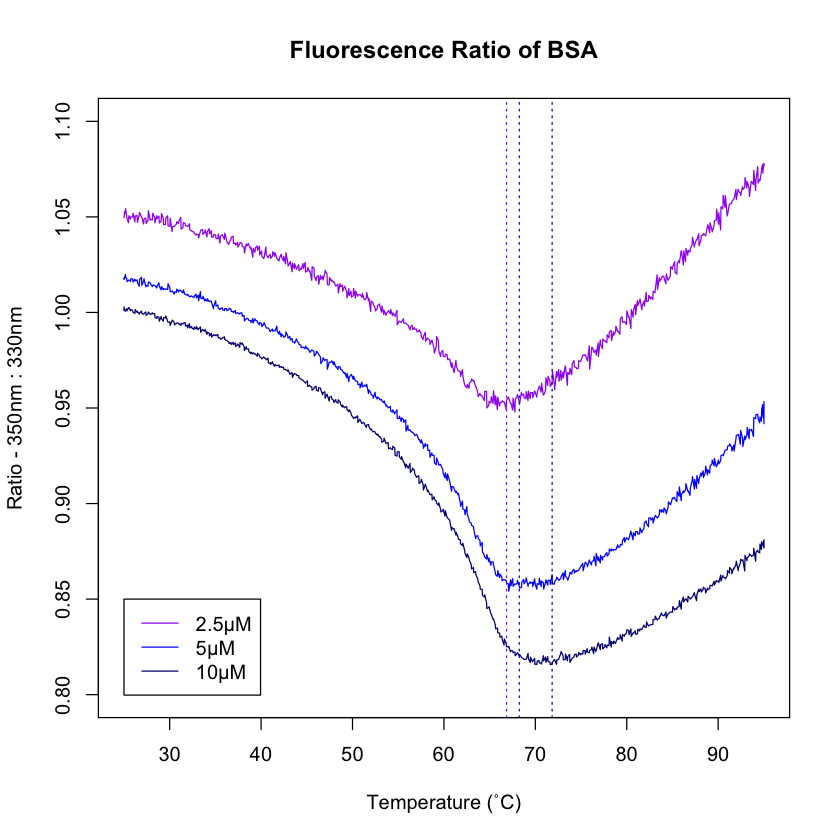

In [16]:
theme = c("purple", "blue", "navy")

# Ratio - 350nm : 330nm
plot(x = data$Temperature.for.Cap.30...C., y = data$Ratio.350.nm...330.nm.for.Cap.30, col = theme[1],
     type = "l", 
     ylim = c(0.8,1.1),
     xlab="Temperature (˚C)", ylab="Ratio - 350nm : 330nm",
     main="Fluorescence Ratio of BSA")
lines(x = data$Temperature.for.Cap.31...C., y = data$Ratio.350.nm...330.nm.for.Cap.31, col = theme[2]) 
lines(x = data$Temperature.for.Cap.32...C., y = data$Ratio.350.nm...330.nm.for.Cap.32, col = theme[3])
abline(v=bsa_transitions_T[1], lty=3, col=theme[1])
abline(v=bsa_transitions_T[2], lty=3, col=theme[2])
abline(v=bsa_transitions_T[3], lty=3, col=theme[3])
legend(25, 0.85, legend=c("2.5µM", "5µM", "10µM"), col=theme, lty=1, cex=1)
dev.print(png, 'resources/unfolding_BSA_ratio.png', width=750, height=750)

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = c(2.5, 5, 10), y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '64.2119 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = c(2.5, 5, 10), y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '64.2119 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = c(2.5, 5, 10), y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '70.1894 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = c(2.5, 5, 10), y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '70.1894 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning mess

pdf 
  2

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”


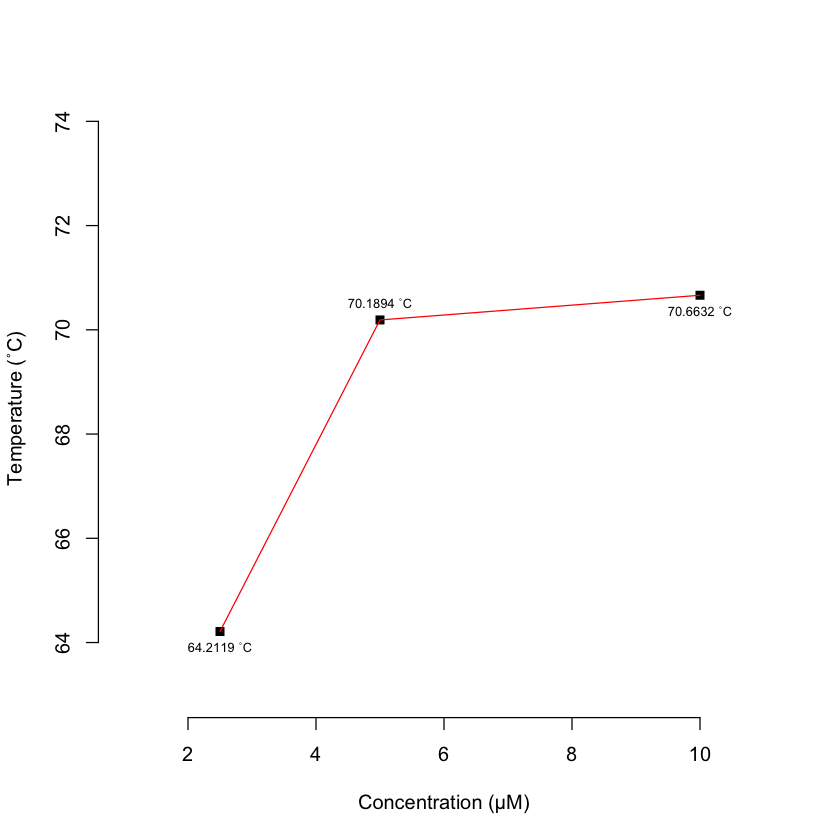

Warning message in text.default(x = c(2.5, 5, 10), y = bsa_transitions_T, labels = paste(bsa_transitions_T, :
“conversion failure on '66.8499 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = c(2.5, 5, 10), y = bsa_transitions_T, labels = paste(bsa_transitions_T, :
“conversion failure on '66.8499 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = c(2.5, 5, 10), y = bsa_transitions_T, labels = paste(bsa_transitions_T, :
“conversion failure on '68.2453 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = c(2.5, 5, 10), y = bsa_transitions_T, labels = paste(bsa_transitions_T, :
“conversion failure on '68.2453 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = c(2.5, 5, 10), y = bsa_transitions_T, labels = paste(bsa_transitions_T, :
“conversion failure on '71.8362 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = c(2.5, 5, 10), y = 

pdf 
  2

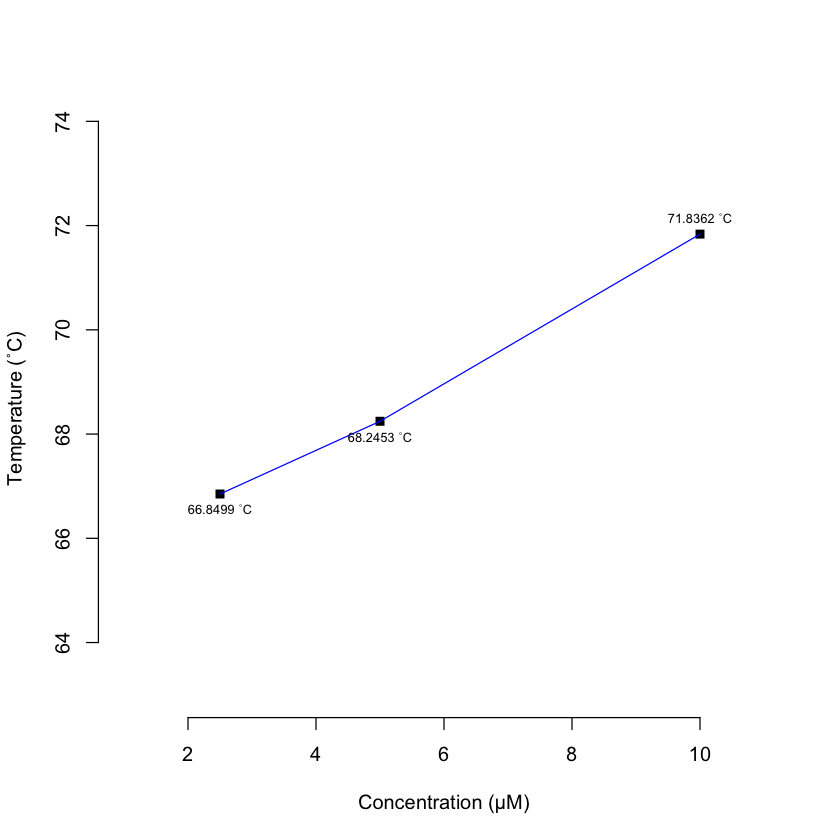

In [9]:
# Lys - Transition Temp vs. Conc
plot(x=c(2.5, 5, 10), y=lys_transitions_T, pch = 15, ylim=c(63, 74), xlim=c(1,11), frame = FALSE, xlab="Concentration (µM)", ylab="Temperature (˚C)")
lines(x=c(2.5, 5, 10), y=lys_transitions_T, col="red")
text(x=c(2.5, 5, 10), y=lys_transitions_T, labels=paste(lys_transitions_T, "˚C"), cex=0.65, pos=c(1,3,1),col="black") 
dev.print(png, 'resources/unfolding_lys_tempVconc.png', width=500, height=500)

# BSA - Transition Temp vs. Conc
plot(x=c(2.5, 5, 10), y=bsa_transitions_T, pch = 15, ylim=c(63, 74), xlim=c(1,11), frame = FALSE, xlab="Concentration (µM)", ylab="Temperature (˚C)")
lines(x=c(2.5, 5, 10), y=bsa_transitions_T, col="blue")
text(x=c(2.5, 5, 10), y=bsa_transitions_T, labels=paste(bsa_transitions_T, "˚C"), cex=0.65, pos=c(1,1,3),col="black") 
dev.print(png, 'resources/unfolding_BSA_tempVconc.png', width=500, height=500)

Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in title(...):
“conversion failure on 'Temperature (˚C)' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = concs, y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '64.2119 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = concs, y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '64.2119 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = concs, y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '70.1894 ˚C' in 'mbcsToSbcs': dot substituted for <cb>”
Warning message in text.default(x = concs, y = lys_transitions_T, labels = paste(lys_transitions_T, :
“conversion failure on '70.1894 ˚C' in 'mbcsToSbcs': dot substituted for <9a>”
Warning message in text.default(x = concs, y

pdf 
  2

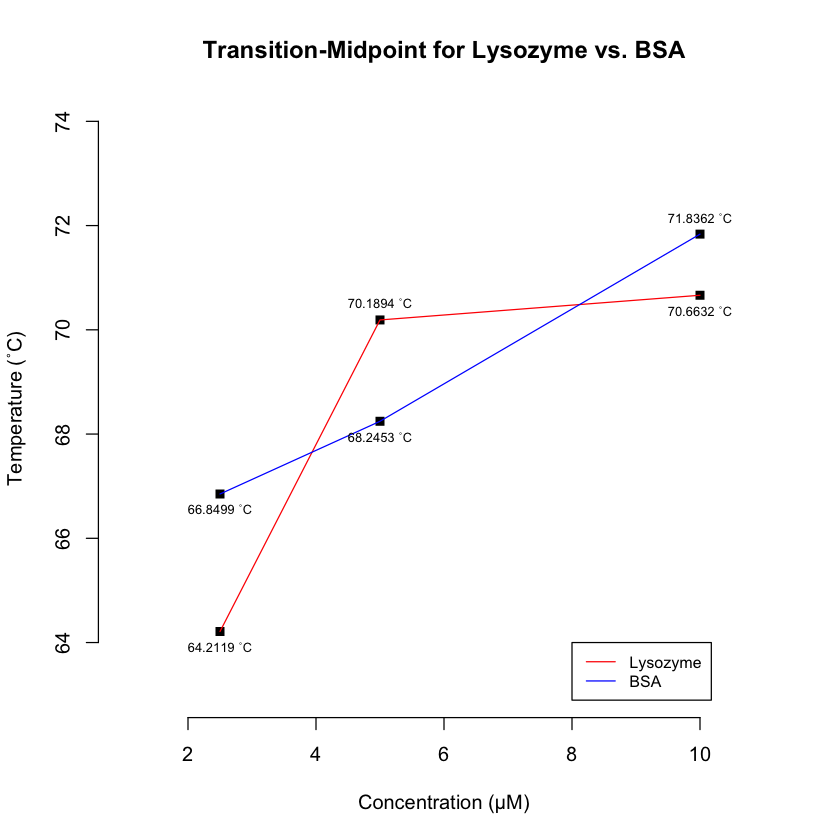

In [10]:
# Lys - Transition Temp vs. Conc
concs = c(2.5, 5, 10)
plot(x=concs, y=lys_transitions_T,
     pch = 15, 
     ylim=c(63, 74), 
     xlim=c(1,11), 
     frame = FALSE, 
     xlab="Concentration (µM)", ylab="Temperature (˚C)", main="Transition-Midpoint for Lysozyme vs. BSA")
points(x=concs, y=bsa_transitions_T, pch = 15, ylim=c(63, 74))
lines(x=concs, y=lys_transitions_T, col="red")
lines(x=concs, y=bsa_transitions_T, col="blue")
text(x=concs, y=lys_transitions_T, labels=paste(lys_transitions_T, "˚C"), cex=0.65, pos=c(1,3,1),col="black") 
text(x=concs, y=bsa_transitions_T, labels=paste(bsa_transitions_T, "˚C"), cex=0.65, pos=c(1,1,3),col="black") 
legend(8, 64, legend=c("Lysozyme", "BSA"), col=c("red", "blue"), lty=1, cex=0.8)
dev.print(png, 'resources/unfolding_tempVconc.png', width=500, height=500)

integer(0)

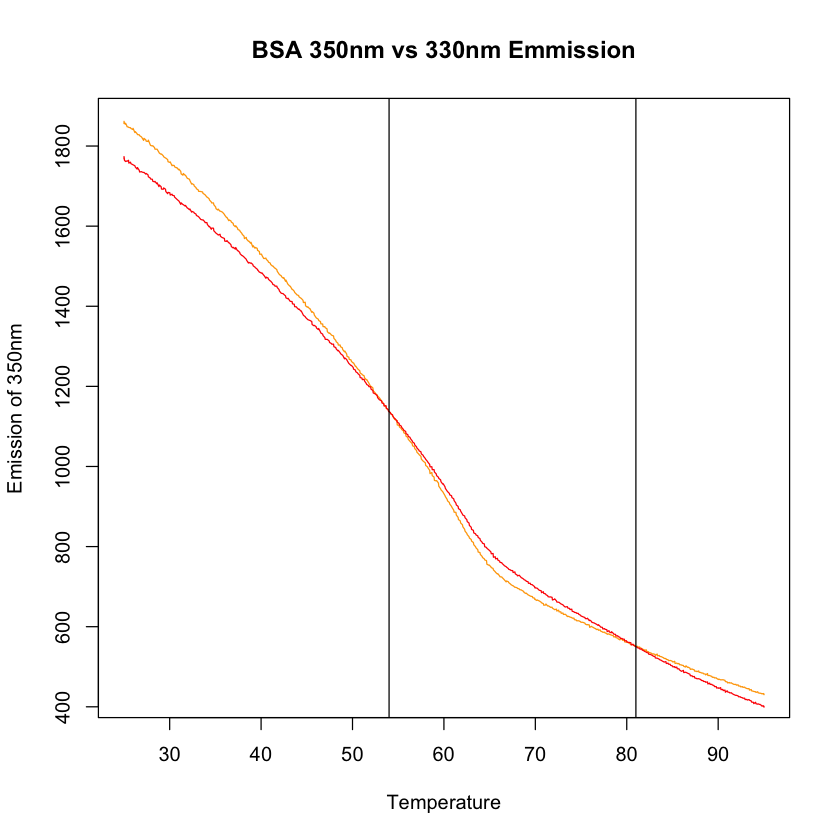

In [11]:
plot(x = data$Temperature.for.Cap.30...C., y = data$X350.nm.for.Cap.30, col="orange",
     type = "l", 
     xlab="Temperature", ylab="Emission of 350nm",
     main="BSA 350nm vs 330nm Emmission") +
lines(x = data$Temperature.for.Cap.30...C., y = data$X330.nm.for.Cap.30, col="red") +
abline(v = 54)+ abline(v = 81)

integer(0)

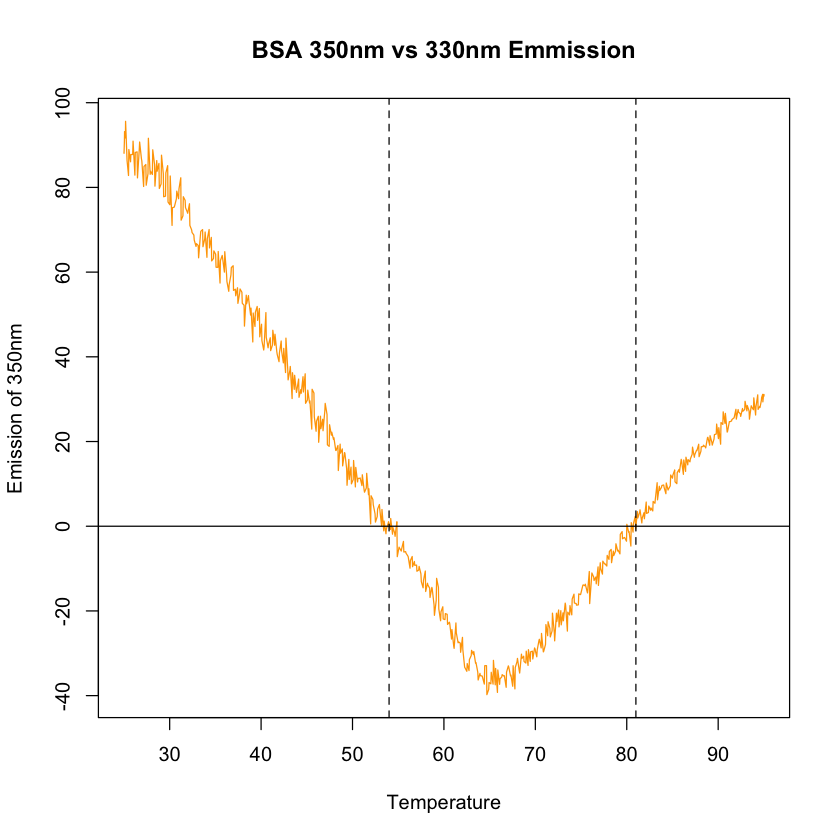

In [12]:
plot(x = data$Temperature.for.Cap.30...C., y = data$X350.nm.for.Cap.30 - data$X330.nm.for.Cap.30, col="orange",
     type = "l", 
     xlab="Temperature", ylab="Emission of 350nm",
     main="BSA 350nm vs 330nm Emmission") +
abline(h = 0)+ abline(v = 54, lty = 2)+ abline(v = 81, lty = 2)